In [58]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib as plt
print('rdy')

rdy


In [19]:
otg = pd.read_excel(r'C:\Users\Granin-ia\Desktop\call2.xlsx', index_col = 'Date')
otg.head()

,Calls
Date,
2019-09-16,709
2019-09-17,707
2019-09-18,634
2019-09-19,704
2019-09-20,748


otg


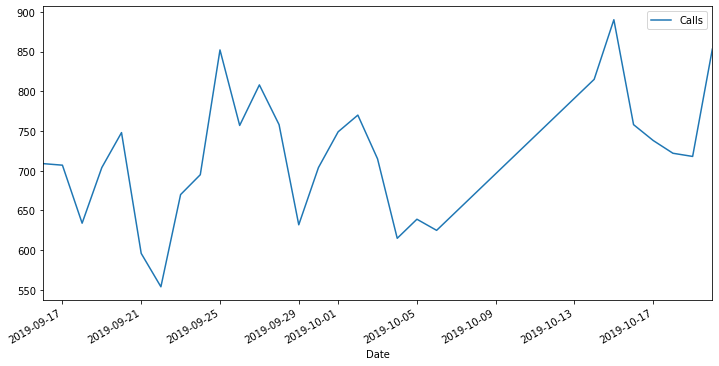

In [21]:
otg.plot(figsize=(12,6))
print('otg')

,Calls
count,28.000000
mean,719.107143
std,81.219565
min,554.000000
25%,662.250000
50%,716.500000
75%,758.000000
max,890.000000


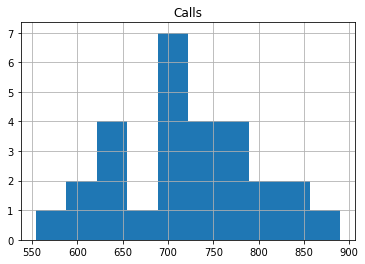

In [22]:
itog = otg.describe()
otg.hist()
itog

In [43]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(otg)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

         JB        
-------------------
0.21053331037167564
 0.9000844783893184
0.10008698521795371
  2.625316794163861
-------------------


In [55]:
otg1diff = otg.diff(periods=1).dropna()

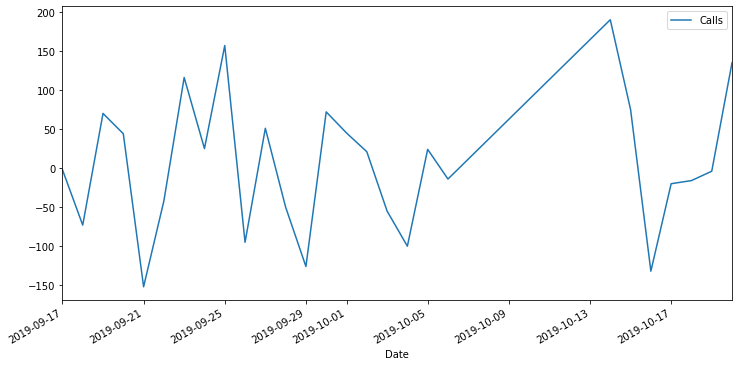

In [56]:
otg1diff.plot(figsize=(12,6))

In [64]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
print('Rdy')

Rdy


predicted=704.636908, expected=615.000000
predicted=641.844105, expected=639.000000
predicted=673.861994, expected=625.000000
predicted=659.978314, expected=815.000000
predicted=788.002983, expected=890.000000
predicted=810.693584, expected=758.000000
predicted=709.800835, expected=738.000000
predicted=682.440311, expected=722.000000
predicted=747.745593, expected=718.000000
predicted=797.817848, expected=853.000000
Test MSE: 5393.212


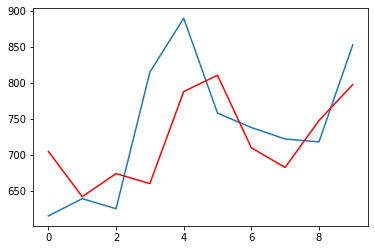

In [65]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_excel(r'C:\Users\Granin-ia\Desktop\call2.xlsx', index_col = 'Date')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()